In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy
import seaborn as sns
import numpy as np
import matplotlib.lines as mlines
from matplotlib.patches import Patch

In [4]:
# individual static pedestrians ID
static_individuals = ["415$", "412$", "4061$", "418$", "4605$"]
static_indivduals_ID = '|'.join(static_individuals)
list_of_means = []
path = "/Users/tracysanchezpacheco/Desktop/Pedestrians_Static_70656182-09b3-4c19-9ae2-0a2ab2e19fed.csv"
# Choosing colors for each pedestrian
color_dict = dict({'face_415': 'blue',
                       'face_412': 'green',
                       'face_4061': 'red',
                       'face_4605': 'orange',
                       'face_418': 'yellow'})
palette = color_dict
list_interactions =[]

def get_static_ped_location_dataframe(path):

    # get the CV file
    df_location = pd.read_csv(path)
    return df_location

def get_static_ped_x_location(df_location):
    # remove the '$' from the list above to allow for the search
    char = '$'
    res = [ele.replace(char, '_x$') for ele in static_individuals]
    search = '|'.join(res)
    # search for the x location of the corresponding pedestrians
    # this gives a list of truth values
    x_static_location = df_location.columns.str.contains(str(search))
    x_static_location = x_static_location.tolist()
    # add th list of truth values into the dataframe to filter it accordingly
    df_location.loc[len(df_location)] = x_static_location
    # filter the dataframe columns based on the last row that contains the above truth values
    row = len(df_location)-1
    value = 1
    list_comp = [c for c in df_location.columns if df_location[c][row] == value]
    filtered_df_location = df_location[list_comp]
    # for the x location since these are static pairs we take the first row
    x_locations_list = filtered_df_location.head(1)
    # flip the dataframe to make the columns as rows and have one column showing the x location
    stacked_df = pd.DataFrame(x_locations_list.stack(0).reset_index())
    # name columns
    stacked_df.columns = ['index','Ped_ID', 'x']
    # reorder columns
    reordered_df = pd.DataFrame(stacked_df, columns=['index', 'Ped_ID', 'x'])
    # remove index column
    reordered_df.pop("index")
    # remove the "_x" from each value of the column ped_ID
    reordered_df["Ped_ID"] = reordered_df['Ped_ID'].str.replace('_x', '')
    return reordered_df

In [7]:
res

['415_x$', '412_x$', '4061_x$', '418_x$', '4605_x$']

In [10]:
search

'415_x$|412_x$|4061_x$|418_x$|4605_x$'

In [11]:
x_static_location

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [12]:
 df_location.loc[len(df_location)] = x_static_location

In [13]:
df_location

,time,421_rot,421_x,421_y,421_z,419_rot,419_x,419_y,419_z,417_rot,...,4623_y,4623_z,4621_rot,4621_x,4621_y,4621_z,4605_rot,4605_x,4605_y,4605_z
0,0.000,270.0,548.161,0.486,573.26,8.000000e-08,557.56,0.501,530.2,291.82,...,0.303003,624.437,208.38858,617.42053,0.367502,624.31430,219.29808,566.5583,1.673807,602.9229
1,0.011,NaN,NaN,NaN,NaN,8.000000e-08,557.56,0.501,530.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,219.29808,566.5583,1.673807,602.9229
2,0.012,270.0,548.161,0.486,573.26,NaN,NaN,NaN,NaN,291.82,...,0.303003,624.437,208.35915,617.42080,0.367467,624.31396,NaN,NaN,NaN,NaN
3,0.022,NaN,NaN,NaN,NaN,8.000000e-08,557.56,0.501,530.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,219.29808,566.5583,1.673807,602.9229
4,0.023,270.0,548.161,0.486,573.26,NaN,NaN,NaN,NaN,291.82,...,0.303003,624.437,208.33050,617.42100,0.367433,624.31370,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224800,1886.999,270.0,548.161,0.486,573.26,8.000000e-08,557.56,0.501,530.2,291.82,...,0.303003,624.437,208.45888,617.44050,0.366092,624.29880,219.29808,566.5583,1.673807,602.9229
224801,1887.011,270.0,548.161,0.486,573.26,8.000000e-08,557.56,0.501,530.2,291.82,...,0.303003,624.437,208.45992,617.44070,0.366088,624.29870,219.29808,566.5583,1.673807,602.9229
224802,1887.021,270.0,548.161,0.486,573.26,8.000000e-08,557.56,0.501,530.2,291.82,...,0.303003,624.437,208.46083,617.44090,0.366085,624.29860,219.29808,566.5583,1.673807,602.9229
224803,1887.033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,219.29808,NaN,NaN,NaN


In [14]:
row = len(df_location)-1
value = 1
list_comp = [c for c in df_location.columns if df_location[c][row] == value]

In [15]:
list_comp

['415_x', '412_x', '4061_x', '418_x', '4605_x']

In [16]:
 filtered_df_location = df_location[list_comp]

In [17]:
filtered_df_location

,415_x,412_x,4061_x,418_x,4605_x
0,526.79,608.323,552.352,562.47,566.5583
1,526.79,NaN,552.352,NaN,566.5583
2,NaN,608.323,NaN,562.47,NaN
3,526.79,NaN,552.352,NaN,566.5583
4,NaN,608.323,NaN,562.47,NaN
...,...,...,...,...,...
224800,526.79,608.323,552.352,562.47,566.5583
224801,526.79,608.323,552.352,562.47,566.5583
224802,526.79,608.323,552.352,562.47,566.5583
224803,NaN,NaN,NaN,NaN,NaN


In [18]:
 x_locations_list = filtered_df_location.head(1)
# flip the dataframe to make the columns as rows and have one column showing the x location
stacked_df = pd.DataFrame(x_locations_list.stack(0).reset_index())
# name columns
stacked_df.columns = ['index','Ped_ID', 'x']
# reorder columns
reordered_df = pd.DataFrame(stacked_df, columns=['index', 'Ped_ID', 'x'])
# remove index column
reordered_df.pop("index")
# remove the "_x" from each value of the column ped_ID
reordered_df["Ped_ID"] = reordered_df['Ped_ID'].str.replace('_x', '')

In [19]:
reordered_df

,Ped_ID,x
0,415,526.7900
1,412,608.3230
2,4061,552.3520
3,418,562.4700
4,4605,566.5583


In [6]:
char = '$'
res = [ele.replace(char, '_x$') for ele in static_individuals]
search = '|'.join(res)
df_location = pd.read_csv(path)
x_static_location = df_location.columns.str.contains(str(search))

In [8]:
# filter the dataframe columns based on the last row that contains the above truth values
row = len(df_location)-1
value = 1
list_comp = [c for c in df_location.columns if df_location[c][row] == value]
filtered_df_location = df_location[list_comp]
# for the x location since these are static pairs we take the first row
x_locations_list = filtered_df_location.head(1)

In [20]:
x_static_location = x_static_location.tolist()
x_static_location
df_location.loc[len(df_location)] = x_static_location

In [3]:
# individual static pedestrians ID
static_individuals = ["415$", "412$", "4061$", "418$", "4605$"]
static_indivduals_ID = '|'.join(static_individuals)
list_of_means = []
path = "/Users/tracysanchezpacheco/Desktop/correTS_mad_wobig_70656182-09b3-4c19-9ae2-0a2ab2e19fed.csv"
# Choosing colors for each pedestrian
color_dict = dict({'face_415': 'blue',
                       'face_412': 'green',
                       'face_4061': 'red',
                       'face_4605': 'orange',
                       'face_418': 'yellow'})
palette = color_dict
list_interactions =[]

def get_static_ped_location_dataframe(path):

    # get the CV file
    df_location = pd.read_csv(path)
    return df_location

def get_static_ped_x_location(df_location):
    # remove the '$' from the list above to allow for the search
    char = '$'
    res = [ele.replace(char, '_x$') for ele in static_individuals]
    search = '|'.join(res)
    # search for the x location of the corresponding pedestrians
    # this gives a list of truth values
    x_static_location = df_location.columns.str.contains(str(search))
    x_static_location = x_static_location.tolist()
    # add th list of truth values into the dataframe to filter it accordingly
    df_location.loc[len(df_location)] = x_static_location
    # filter the dataframe columns based on the last row that contains the above truth values
    row = len(df_location)-1
    value = 1
    list_comp = [c for c in df_location.columns if df_location[c][row] == value]
    filtered_df_location = df_location[list_comp]
    # for the x location since these are static pairs we take the first row
    x_locations_list = filtered_df_location.head(1)
    # flip the dataframe to make the columns as rows and have one column showing the x location
    stacked_df = pd.DataFrame(x_locations_list.stack(0).reset_index())
    # name columns
    stacked_df.columns = ['index','Ped_ID', 'x']
    # reorder columns
    reordered_df = pd.DataFrame(stacked_df, columns=['index', 'Ped_ID', 'x'])
    # remove index column
    reordered_df.pop("index")
    # remove the "_x" from each value of the column ped_ID
    reordered_df["Ped_ID"] = reordered_df['Ped_ID'].str.replace('_x', '')
    return reordered_df



# get the y location of each pedestrian in the pairs group from the file that have location data
def get_static_ped_y_location(df_location, reordered_df):
    # remove the '$' from the list above to allow for the search
    char = '$'
    res = [ele.replace(char, '_z$') for ele in static_individuals]
    search = '|'.join(res)
    # search for the x location of the corresponding pedestrians
    # this gives a list of truth values
    y_static_location = df_location.columns.str.contains(str(search))
    y_static_location = y_static_location.tolist()
    # add th list of truth values into the dataframe to filter it accordingly
    df_location.loc[len(df_location)] = y_static_location
    # filter the dataframe columns based on the last row that contains the above truth values
    row = len(df_location)-1
    value = 1
    list_comp = [c for c in df_location.columns if df_location[c][row] == value]
    filtered_df_location = df_location[list_comp]
    # for the x location since these are static pairs we take the first row
    y_locations_list = filtered_df_location.head(1)
    # flip the dataframe to make the columns as rows and have one column showing the x location
    stacked_df = pd.DataFrame(y_locations_list.stack(0).reset_index())
    # name columns
    stacked_df.columns = ['index', 'Ped_ID', 'y']
    # reorder columns
    reordered_df_y = pd.DataFrame(stacked_df, columns=['index', 'Ped_ID', 'y'])
    # remove index column
    reordered_df_y.pop("index")
    # remove the "_z" from each value of the column ped_ID
    reordered_df_y["Ped_ID"] = reordered_df_y['Ped_ID'].str.replace('_z', ' ')

    y_list = reordered_df_y["y"].tolist()

    reordered_df.insert(column="y", value=y_list, loc=2)
    reordered_df["Ped_ID"] = ["face_"+str(x) for x in reordered_df['Ped_ID']]

    return reordered_df



def get_files(path):
    path = r"C:\Users\reemh\Desktop\Bachelor Project\MAD_sacc\All_participants_44"
    all_files = glob.glob(path + "/*.csv")
    #result = [all_files[24]]
    return all_files


# function to get the data
def get_data(filename):
    filename
    # upload the data
    data = pd.read_csv(filename)
    return data


# get the time data
def get_time(data):
    # get the time column from the data
    time = data["time"].tolist()
    return time


#  get a dataframe that includes pedestrians names, and the time window around each pedestrian
def get_dataframe_with_time_window_details(data):
    # get the gazes onset
    gaze_onset = data[data["events"] == 2.0]

    # get gazes onset on faces
    face_gaze = gaze_onset[gaze_onset["names"].str.contains("face", regex=False, na=False)]

    # get gazes onset on faces of static individual pedestrians
    face_gaze_static_individual_ped = face_gaze[face_gaze["names"].str.contains(static_indivduals_ID, na=False)]

    # get each name for encountered pedestrian
    names = face_gaze_static_individual_ped["names"].tolist()

    # get time window in which we check the path of participant around each pedestrian 
    window_lower = face_gaze_static_individual_ped["time"] - 50
    window_upper = face_gaze_static_individual_ped["time"] + 150

    # change them to lists
    window_lower = window_lower.tolist()
    window_upper = window_upper.tolist()

    # construct a data frame with all the important information
    d = {"ped_name": names, "window lower": window_lower, "window upper": window_upper}
    df_summary = pd.DataFrame(d)

    # filter consecutive duplicates and insert them to the data frame
    c = (df_summary["ped_name"].shift() != df_summary['ped_name']).cumsum()
    df_summary.insert(column="t_v", value=c, loc=0)
    group_results = []

    for i, group in df_summary.groupby(['t_v']):
        c = (group["window lower"].diff() < 50).eq(False).cumsum()
        group.insert(column = "same_range", value = c, loc = 0)
        agg_dict = {
            "ped_id": pd.NamedAgg(column='ped_name', aggfunc='first'),
            "w_l": pd.NamedAgg(column='window lower', aggfunc='min'),
            "w_u": pd.NamedAgg(column='window upper', aggfunc='max')
        }
        result = group.groupby(["same_range"]).agg(**agg_dict)
        group_results.append(result)
        group_results

    df_sorted = pd.concat(group_results)


    return df_sorted


# function to get pedestrian's location and added to sorted dataframe
def get_ped_location(df_sorted, time, data, reordered_df):
    x_coord_ped = []
    y_coord_ped = []

    window_lower = df_sorted.w_l.tolist()
    window_upper = df_sorted.w_u.tolist()
    ped_list = df_sorted.ped_id.tolist()

    for i in range(len(window_lower)):
        ped = ped_list[i]
        x_coord_ped.append(reordered_df.loc[reordered_df["Ped_ID"]== ped, 'x'].iloc[0])
        y_coord_ped.append(reordered_df.loc[reordered_df["Ped_ID"]== ped, 'y'].iloc[0])

    # adding the two lists as columns in the data frame
    df_sorted.insert(column="x_coord_ped", value=x_coord_ped, loc=3)
    df_sorted.insert(column="y_coord_ped", value=y_coord_ped, loc=4)

    return df_sorted



def check_if_ped_visted_more_times(df_sorted):
    familiarity = []

    duplicated_check = df_sorted["ped_id"].duplicated()
    for i in duplicated_check:
        if i == True:
            familiarity.append("familiar")
        else:
            familiarity.append(" not familiar")
    df_sorted.insert(column= "familiarity", value=familiarity , loc=5)
    return df_sorted


# get the pathways map and the minimal distance
def get_trajectory_map_and_minimal_distance(df_sorted, time, data, index):
    minimal_distance = []
    maximal_distance = []
    familiar = []
    names_in = []
    df_for_all_ped = []
# create lists of the same length taking the columns information in dataframe
    names = df_sorted.ped_id.tolist()
    window_lower = df_sorted.w_l.tolist()
    window_upper = df_sorted.w_u.tolist()
    x_ped_list = df_sorted.x_coord_ped.tolist()
    y_ped_list = df_sorted.y_coord_ped.tolist()
    familiarity_list = df_sorted.familiarity.tolist()
    fig, ax = plt.subplots(1, 1, figsize=(8,8), dpi = 140)
# get the name, location and window  around one pedestrian
    for i in range(len(window_lower)):

        ped_id = names[i]
        w_low = window_lower[i]
        w_up = window_upper[i]
        x_ped = x_ped_list[i]
        y_ped = y_ped_list[i]
        familiarity = familiarity_list[i]
        results = []
# get the data in the time window
        ts = time[time.index(list(filter(lambda j: j > w_low, time))[0]):time.index(list(filter(lambda j: j < w_up, time))[-1]) + 1]
        data_small = (data.iloc[time.index(ts[0]):(time.index(ts[-1]) + 1)])
# get the participant location at each time point
        x_coordinate_par = data_small["xhead_orig"]
        y_coordinate_par = data_small["zhead_orig"]
# get x,y location of participant (taking into account ped location is (0,0) always)
        x = [i - x_ped for i in x_coordinate_par]
        y = [j - y_ped for j in y_coordinate_par]
        familiar = [familiarity for i in y_coordinate_par]
# create data frame with the coordinates pathway around each participant
        m = {"ped_id": ped_id, "x": x, "y": y, "familiarity": familiar}
        df_plot = pd.DataFrame(m)
# calculate the min distance for each pathway around pedestrian
        distance = ((df_plot["y"]) ** 2 + (df_plot["x"]) ** 2) ** 0.5
        df_plot.insert(column="distance", value=distance, loc=4)
        df_copy = df_plot.copy()
        df_plot = df_plot[df_plot.distance < 13]
        distance_df = df_plot.distance.tolist()
        name_1 = df_plot["ped_id"].tolist()


        if len(distance_df) != 0:
            min_distance = np.nanmin(distance_df)
            #min_distance = np.nanmin(((df_plot["y"]) ** 2 + (df_plot["x"]) ** 2) ** 0.5)

            if min_distance < 10:
                name_to_insert = name_1[0]
                names_in.append(name_to_insert)
                minimal_distance.append(min_distance)


        df_for_all_ped.append(df_plot)

    number_of_interactions = len(names_in)
    df_plot_result = pd.concat(df_for_all_ped)

# plotting the trajectory map
    # TODO : find a way to inluce familiarity in the plot
    circle2 = plt.Circle((0, 0), 1.22, color='#EE7718',edgecolor= '#FAB87C', alpha = 0.75)
    circle1 = plt.Circle((0, 0), 3.65, color='#FAB87C', alpha = 0.55, linewidth=1)
    palette = sns.color_palette(['gray'])
    ax = sns.scatterplot(data=df_plot_result, x='x', y='y', alpha=0.05, hue='ped_id', palette= palette, linewidths = 0.1, legend = False) #palette=palette)
    ax.add_patch(circle1)
    ax.add_patch(circle2)

# title and axes organization
   # plt.title(("Trajectory map of participant number " + str(index) + "\n interacting with " + str(len(set(names_in))) + " static individual pedestrians\n"), size=14, fontweight='bold')
    plt.axhline(color='black', lw=0.5)
    plt.axvline(color='black', lw=0.5)
    plt.xlabel("x", size = 15)
    plt.xticks(size = 15)
    plt.yticks(size =15)
    plt.ylabel("z", size = 15)
    plt.xlim(-9,+9)
    plt.ylim(-9, +9)


    # dropping duplicates from seaborn legend
    def legend_without_duplicate_labels(figure):
        handles, labels = plt.gca().get_legend_handles_labels()

        handles.append(Patch(facecolor='#FAB87C', edgecolor='#FAB87C', alpha=0.55))
        labels.append("Social space")
        handles.append(Patch(facecolor='#EE7718', edgecolor='#EE7718', alpha=0.75))
        labels.append("Personal space")
        by_label = dict(zip(labels, handles))
        lgd = figure.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.95, 0.99), loc=2, borderaxespad=0, fontsize='large')  #.set_title("Pedestrian's ")

    legend_without_duplicate_labels(plt)
    plt.subplots_adjust(right=0.7)
    plt.tight_layout(pad = 1, rect= (0.5,0.5,0.5,0.5))
    plt.show()
    return number_of_interactions,minimal_distance, names_in


def get_box_plot(df_sorted, time, data, minimal_distance,df_plot):
    names_in = []
    # create lists of the same length taking the columns information in dataframe
    names = df_sorted.ped_id.tolist()
    window_lower = df_sorted.w_l.tolist()
    window_upper = df_sorted.w_u.tolist()
    x_ped_list = df_sorted.x_coord_ped.tolist()
    y_ped_list = df_sorted.y_coord_ped.tolist()
    familiarity_list = df_sorted.familiarity.tolist()
    results = []
    # get the name, location and window  around one pedestrian
    for i in range(len(window_lower)):

        ped_id = names[i]
        w_low = window_lower[i]
        w_up = window_upper[i]
        x_ped = x_ped_list[i]
        y_ped = y_ped_list[i]

        # get the data in the time window
        ts = time[time.index(list(filter(lambda j: j > w_low, time))[0]):time.index(
            list(filter(lambda j: j < w_up, time))[-1]) + 1]

        data_small = (data.iloc[time.index(ts[0]):(time.index(ts[-1]) + 1)])

        # get the participant location at each time point
        x_coordinate_par = data_small["xhead_orig"]

        y_coordinate_par = data_small["zhead_orig"]

        # get x,y location of participant (taking into account ped location is (0,0) always)
        x = [i - x_ped for i in x_coordinate_par]
        y = [j - y_ped for j in y_coordinate_par]

        # create data frame with the coordinates pathway around each participant
        m = {"ped_id": ped_id, "x": x, "y": y}
        df_plot = pd.DataFrame(m)

        # calculate the distance for each pathway around pedestrian
        distance = ((df_plot["y"]) ** 2 + (df_plot["x"]) ** 2) ** 0.5
        df_plot.insert(column="distance", value=distance, loc=3)

        df_plot = df_plot[df_plot.distance < 10]
        min_distance = np.nanmin(df_plot.distance)
        max_distance = np.nanmax(df_plot.distance)
        results.append(df_plot)

    df_plot = pd.concat(results)
    minimal_distance_box_plot = sns.boxplot(data = df_plot, x = "ped_id", y = "distance", width= 0.4, fliersize = 3).set_title("The distance distribution of one participant around diffrent pedestrians ")
    plt.ylabel('Distance(m)')
    plt.xlabel('Pedestrians')
    return minimal_distance_box_plot


def get_bar_plot(minimal_distance, names_in, index):
    customized_color_dict = {}
    fig, ax = plt.subplots(1, 1, figsize=(7, 7), dpi = 120)
    m = {"names": names_in, "minimal_distance": minimal_distance}
    df = pd.DataFrame(m)
    for i in names_in:
        customized_color_dict[i] = color_dict.get(i)

    df = df[df.minimal_distance < 10]

    ax = sns.barplot(x=df.index, y='minimal_distance',hue= "names", palette=customized_color_dict, data = df, errorbar=None, dodge=False)
    line0 = plt.axhline(y= numpy.nanmedian(minimal_distance), color='red', alpha= 1)
    line1 = plt.axhline(y=3.65, color='blue', linestyle='-', alpha= 1)
    line2 = plt.axhline(y=1.22, color='green', linestyle='-', alpha= 1)
    sns.color_palette("tab10")
    for bar in ax.patches:
       ax.annotate(format(bar.get_height(), '.2f'),
                       (bar.get_x() + bar.get_width()/2,
                       bar.get_height()), ha='center', va='center',
                      size=10, xytext=(0, 8),
                      textcoords='offset points')
    plt.ylim(0, 12)
    plt.xlabel("Pedestrian's name", size=10)
    plt.ylabel("Minimum distance (m) ", size=10)
    ax.set_title(" Bar plot analysis of the minimum distance distribution\n for participant number " + str(index) + " in static individuals condition\n ", size = 12, fontweight='bold')
    list_of_names = df.names.tolist()
    res = [ele.replace("face_", ' ') for ele in list_of_names]
    ax.set_xticklabels(res)

    if len(df.names) == 1:
        ax.set_xticks(range(5))

    else:
        ax.set_xticks(range(len(df.names)))
    def legend_without_duplicate_labels(figure):
        handles, labels = plt.gca().get_legend_handles_labels()
        labels = [ele.replace("face_", ' ') for ele in labels]
        handles.append(line0)
        labels.append("Average minimum distance\n of all pathways = " + str(round(numpy.nanmedian(minimal_distance), 2)))
        handles.append(line1)
        labels.append("Pedestrians' social\n space border")
        handles.append(line2)
        labels.append("Pedestrians' personal\n space border")
        by_label = dict(zip(labels, handles))
        lgd = figure.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.99,0.99),loc = 1,borderaxespad=0)
    legend_without_duplicate_labels(plt)
    plt.subplots_adjust(right=0.7)
    plt.tight_layout(pad=3, rect=(0.5, 0.5, 0.5, 0.5))
    plt.show()
    return df

def get_minimal_distances_plot(minimal_distance, index):
    fig, ax = plt.subplots(1, 1, figsize=(7,7), dpi = 120 )
    ax = sns.distplot(minimal_distance, bins=[0,1, 2, 3, 4, 5, 6, 7,8,9], color = "skyblue",   kde=False, norm_hist=False,  hist_kws={"rwidth":1.0,'edgecolor':'black', 'alpha':1.0}).set_title("Minimum distance histogram distribution for \n participant number " + str(index) + " in the static individuals condition\n", size = 12,  fontweight='bold')
    plt.axvline(x=numpy.nanmedian(minimal_distance), color='red',alpha = 0.8, label="average minimum distance\n across all pathways = " + str(round(numpy.nanmedian(minimal_distance), 2)))
    plt.axvline(x=3.65, color='blue', label="Pedestrians' social space border", alpha=0.8)
    plt.axvline(x=1.22, color='green', label="Pedestrians' personal space border", alpha = 0.8)
    plt.legend()
    plt.xlim(0,9)
    plt.xticks(np.arange(0, 9,1))
    plt.ylim(0,12)
    plt.xlabel('Distance(m)')
    plt.ylabel('Counts')
    plt.show()



def get_box_plot_across_all_participants(df_plot_across_participants):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    plt1 = sns.boxplot(data=df_plot_across_participants, x = "participant_number", y = "minimal_distance", showfliers=False, color= "skyblue")
    plt1 = sns.swarmplot(data=df_plot_across_participants, x = "participant_number", y = "minimal_distance",color = "black",marker="o",alpha=0.7)
    line1 = plt.axhline(y = 3.65, color = 'blue', linestyle = '-', alpha = 0.7)
    line2 = plt.axhline(y=1.22, color='green', linestyle='-', alpha = 0.7)
    line3 = plt.axhline(y=numpy.nanmedian(list_of_means), color='red')
    #list_of_names = range(1,16)
    #ax.set_xticklabels(list_of_names)
    plt.xlabel("Participant's number", size=10)
    plt.ylabel("Minimum distance (m)", size=10)
    ax.set_title("Minimum distance box plot across 16 participants \n in the static individuals condition.\n", size=14, fontweight='bold')
    def legend_without_duplicate_labels(figure):
        handles, labels = plt.gca().get_legend_handles_labels()
        handles.append(line3)
        labels.append("The average minimum distance\n across all participants =" + str(round(numpy.nanmedian(list_of_means), 2)))
        handles.append(line1)
        labels.append("Pedestrians' social space border")
        handles.append(line2)
        labels.append("Pedestrians' personal space border")

        by_label = dict(zip(labels, handles))
        lgd = figure.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.99,0.99), loc = "upper right",borderaxespad=0)
    legend_without_duplicate_labels(plt)
    plt.ylim(0, 10)
    plt.show()


def get_bar_plot_across_all_participants(list_of_means):
    participant_number = range(0, len(list_of_means))
    m = {"participant_number": participant_number, "average_minimum_distance": list_of_means}
    df_barplot = pd.DataFrame(m)
    fig, ax = plt.subplots( figsize=(16,16))
    sns.barplot(data=df_barplot, x="participant_number", y="average_minimum_distance",errorbar=None)
    plt.xlabel("participant's number", size=10)
    plt.ylabel("Minimum distance (m) ", size=10)
    ax.set_title("Bar plot analysis of minimum distances across 16 participants ", size=14)
    line1 = plt.axhline(y=3.65, color='blue', linestyle='-', alpha = 0.2)
    line2 = plt.axhline(y=1.22, color='green', linestyle='-', alpha= 0.2)
    line3 = plt.axhline(y= numpy.nanmedian(list_of_means), color='red', linestyle='-', alpha = 0.2)
    def legend_without_duplicate_labels(figure):
        handles, labels = plt.gca().get_legend_handles_labels()
        handles.append(line3)
        labels.append("Minimum distance average\n across all participant  = " + str(round(numpy.nanmedian(list_of_means), 2)))
        handles.append(line1)
        labels.append("Pedestrians' social space border")
        handles.append(line2)
        labels.append("Pedestrians' personal space border")
        by_label = dict(zip(labels, handles))
        lgd = figure.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.99,0.99), loc="upper right", borderaxespad=0)

    legend_without_duplicate_labels(plt)


    plt.show()




def get_distribution_plot_across_all_participants(list_of_means):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8), dpi = 100)
    sns.distplot(list_of_means, bins=[0,1, 2, 3, 4, 5, 6, 7,8,9], kde=False, norm_hist=False, hist_kws={"rwidth":1.0,'edgecolor':'black', 'alpha':1.0}).set_title('The distribution of minimum distance averages  \n of 16 participants around individual pedestrians.\n', fontweight='bold', size = 14)
    plt.axvline(x=numpy.nanmedian(list_of_means), color='red', label= "Average minimum distance \n across all participants = " + str(round(numpy.nanmedian(list_of_means), 2)))
    plt.axvline(x=3.65, color='blue', label="Pedestrians' social space border", alpha=0.8)
    plt.axvline(x=1.22, color='green', label="Pedestrians' personal space border", alpha=0.8)
    plt.legend()
    plt.xlim(0, 9)
    plt.xticks(np.arange(0, 9, 1))
    plt.ylim(0, 10)
    plt.xlabel('Distance(m)')
    plt.ylabel("Counts")
    plt.show()

def get_average_minimum_distance_across_participant(list_of_means):
    #TODO : find a way to add all other results such as group and pairs as well as miving resutls to the plot

    participant_number = range(0,len(list_of_means))
    m = {"participant number": participant_number, "Static_individuals": list_of_means}
    df_average_min_distance = pd.DataFrame(m)
    fig, ax = plt.subplots(figsize=(8, 8))
    plt1 = sns.boxplot(data=df_average_min_distance, y="Static_individuals", showfliers=False,color="skyblue")
    plt1 = sns.swarmplot(data=df_average_min_distance, y="Static_individuals", color="black",marker="o", alpha=0.7)
    ax.set_xticks((0,1))
    ax.set_xticklabels(('static_individuals', 'Moving_individuals'))

    plt.show()

def get_minimal_distance_across_participants_in_regard_to_each_pedestrian(df_plot_across_participants):
    res = [ele.replace("$", "") for ele in static_individuals]
    ped_name = []
    minimum_distance_mean = []

    for i in res:
        name = "face_"+str(i)
        df_filterd_ped_name = df_plot_across_participants[df_plot_across_participants["names"]== name]
        min_distance_for_ped = df_filterd_ped_name.minimal_distance.tolist()
        mean_min_distance = numpy.nanmedian(min_distance_for_ped)
        ped_name.append(name)
        minimum_distance_mean.append(mean_min_distance)

    m= {"ped_name": ped_name, "min_distance_mean": minimum_distance_mean}
    df_min_distance_mean_from_ped = pd.DataFrame(m)


    return df_min_distance_mean_from_ped


def main():
    df_across_participant = []
    num_ind_per_condition = []
    all_files = get_files(r"/Users/tracysanchezpacheco/Desktop/correTS_mad_wobig_70656182-09b3-4c19-9ae2-0a2ab2e19fed.csv")
    for filename in all_files:
        index = all_files.index(filename)

        df_location = get_static_ped_location_dataframe(path)
        reordered_df= get_static_ped_x_location(df_location)
        reordered_df = get_static_ped_y_location(df_location, reordered_df)
        data = get_data(filename)
        time = get_time(data)
        df_sorted = get_dataframe_with_time_window_details(data)


        df_sorted = get_ped_location(df_sorted, time, data,  reordered_df)
        df_sorted = check_if_ped_visted_more_times(df_sorted)
        number_of_interactions,minimal_distance, names_in = get_trajectory_map_and_minimal_distance(df_sorted, time, data, index)
        num_ind_per_condition.append(number_of_interactions)
        df = get_bar_plot(minimal_distance, names_in, index)
        names_list = df.names.tolist()
        num_of_par = [index for x in range(len(names_list))]
        df.insert(column = "participant_number", value= num_of_par, loc = 2)
        df_across_participant.append(df)
        #box_plot = get_box_plot(df_sorted, time, data, minimal_distance,df_plot)
        #plt.show()
       # min_distance_box_plot = get_boxplot_min(df_sorted, minimal_distance)
        #plt.show()
        mean_minimal_distances = numpy.nanmedian(minimal_distance)
        get_minimal_distances_plot(minimal_distance, index)
        list_of_means.append(mean_minimal_distances)

    np.savetxt("staticIndividual.csv", [round(p, 2) for p in list_of_means], delimiter=',')
    median_ind = numpy.nanmedian(num_ind_per_condition)
    q3, q1 = numpy.percentile(num_ind_per_condition, [75,25])
    iqr = q3 - q1

    get_average_minimum_distance_across_participant(list_of_means)
    get_distribution_plot_across_all_participants(list_of_means)
    df_plot_across_participants = pd.concat(df_across_participant)
    df_min_distance_mean_from_ped = get_minimal_distance_across_participants_in_regard_to_each_pedestrian(df_plot_across_participants)
    #get_bar_plot_across_all_participants(df_plot_across_participants)
    get_box_plot_across_all_participants(df_plot_across_participants)
    print("The median of number of interactions in the  indivdual condition is " + str(median_ind))
    print("The interquartile value is " + str(iqr))
    pass



# Press the green button in the gutter to run the script.
if __name__ == '__main__':
    main()

# See PyCharm help at https://www.jetbrains.com/help/pycharm/


IndexError: index -1 is out of bounds for axis 0 with size 0

In [2]:
import numpy as np 
import seaborn as sns 
import pandas as pd 

In [5]:
consta = pd.read_csv("/Users/tracysanchezpacheco/Desktop/datos_tesis1.csv", sep=";")

In [6]:
consta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4452 entries, 0 to 4451
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           4452 non-null   int64  
 1   EDAD                         4452 non-null   int64  
 2   EVENT                        4452 non-null   object 
 3   RESPONSE_TIME                4452 non-null   int64  
 4   ACCURACY                     4452 non-null   int64  
 5   OVERLAP                      4452 non-null   object 
 6   COGNITIVE_LOAD               4452 non-null   int64  
 7   carga_cog                    4452 non-null   object 
 8   Condicion                    4101 non-null   float64
 9   CONDICION                    4101 non-null   object 
 10  Resp_condicion               4452 non-null   object 
 11  Q_correctas_Cattel           4452 non-null   int64  
 12  Porcentaje_Correctas_cattel  4344 non-null   object 
dtypes: float64(1), int

<AxesSubplot: xlabel='CONDICION', ylabel='ACCURACY'>

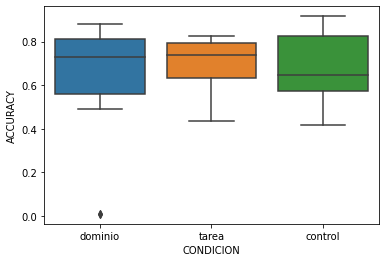

In [14]:
sns.boxplot(x=PropCorrect.CONDICION, y=PropCorrect.ACCURACY)

In [15]:
consta.groupby("CONDICION")["ACCURACY"].mean()

CONDICION
control    0.665953
dominio    0.637346
tarea      0.693122
Name: ACCURACY, dtype: float64

In [16]:
PropCorrect = pd.DataFrame(consta.groupby(["ID", "CONDICION", "Q_correctas_Cattel"])["ACCURACY"].mean())
PropCorrect.reset_index(inplace=True)

In [13]:
PropCorrect

,ID,CONDICION,ACCURACY
0,1,dominio,0.490741
1,2,dominio,0.814815
2,3,dominio,0.805556
3,4,dominio,0.824074
4,5,tarea,0.740741
5,7,tarea,0.768519
6,8,dominio,0.009259
7,9,control,0.824074
8,10,dominio,0.648148
9,11,control,0.590476


<AxesSubplot: xlabel='Q_correctas_Cattel', ylabel='ACCURACY'>

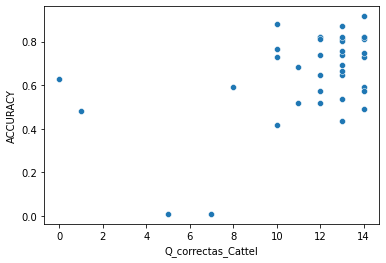

In [17]:
sns.scatterplot(x=PropCorrect.Q_correctas_Cattel, y=PropCorrect.ACCURACY)